In [80]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

# Final Project

Please see the [Final Project Description](https://www.cs.williams.edu/~cs104/docs/project2.html) for instructions and deadlines.

All work should appear in this notebook.  We've created some cells for you, but you may add as many additional cells as you like to each part.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting and are easily identified because they do not have the brackets `[ ]` in the left margin.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).


In [81]:
# Run this cell to set up the notebook.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines make plots look nice and hide some messy Python warnings.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', np.VisibleDeprecationWarning)
warnings.simplefilter('ignore', UserWarning)

# For special interactions
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [82]:
from table_cleaner import * 

In [83]:
from cs104_inference import *

## 0. Source of data


SUSTAINABLE DEVELOPMENT SOLUTIONS NETWORK

Dataset : https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv


"The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others."

copied from: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv 

## 1. Quantitative questions


**Quantiative question 1:** 

<a id="qt1"></a>To what extent do different factors such as GDP, life expectancy, social support and generosity contribute to the happiness score of countries?

**Quantitative question 2:** 

How has the happiness score changed over time for countries and what factors contributed most to these changes?

## 2. Data: Loading and Cleaning

Be sure to upload your csv files to the project on our server, and to clean your data if there are any missing values or other problems.  We have included the table cleaning code from Lab 5.  Be sure to refer to that lab both for a refresher on these tasks.

In [84]:
happy15 = Table().read_table('2015.csv')
happy16 = Table().read_table('2016.csv')
happy17 = Table().read_table('2017.csv')
happy18 = Table().read_table('2018.csv')
happy19 = Table().read_table('2019.csv')

In [85]:
yeararray15 = np.repeat(2015,158)
yeararray16 = np.repeat(2016,157)
yeararray17 = np.repeat(2017,155)
yeararray18 = np.repeat(2018,156)
yeararray19 = np.repeat(2019,156)

<font color='purple'>

##### The above cells are for loading data into our notebook.

##### The cells below streamline column names and categories across years.

In [86]:
happy15 = happy15.relabeled('Happiness Rank','Happy Rank')
happy15 = happy15.relabeled('Happiness Score','Happy Score')
happy15 = happy15.drop('Standard Error','Dystopia Residual')
happy15 = happy15.relabeled("Economy (GDP per Capita)",'GDP')
happy15 = happy15.relabeled("Health (Life Expectancy)",'Health')
happy15 = happy15.relabeled("Trust (Government Corruption)",'GOV Trust')
happy15 = happy15.with_columns('Year', yeararray15)
happy15 = happy15.select('Year','Country','Happy Rank','Happy Score','GDP','GOV Trust','Family','Health','Freedom','Generosity')
happy15.show(2)

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2015,Switzerland,1,7.587,1.39651,0.41978,1.34951,0.94143,0.66557,0.29678
2015,Iceland,2,7.561,1.30232,0.14145,1.40223,0.94784,0.62877,0.4363


In [87]:
happy16 = happy16.relabeled('Happiness Rank','Happy Rank')
happy16 = happy16.relabeled('Happiness Score','Happy Score')
happy16 = happy16.drop('Lower Confidence Interval','Upper Confidence Interval',"Dystopia Residual",)
happy16 = happy16.relabeled("Economy (GDP per Capita)",'GDP')
happy16 = happy16.relabeled("Health (Life Expectancy)",'Health')
happy16 = happy16.relabeled("Trust (Government Corruption)",'GOV Trust')
happy16 = happy16.with_columns('Year', yeararray16)
happy16 = happy16.select('Year','Country','Happy Rank','Happy Score','GDP','GOV Trust','Family','Health','Freedom','Generosity')
happy16.show(2)

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2016,Denmark,1,7.526,1.44178,0.44453,1.16374,0.79504,0.57941,0.36171
2016,Switzerland,2,7.509,1.52733,0.41203,1.14524,0.86303,0.58557,0.28083


In [88]:
happy17 = happy17.relabeled('Happiness.Rank','Happy Rank')
happy17 = happy17.relabeled('Happiness.Score','Happy Score')
happy17 = happy17.drop('Whisker.high','Whisker.low','Dystopia.Residual')
happy17 = happy17.relabeled("Economy..GDP.per.Capita.",'GDP')
happy17 = happy17.relabeled("Health..Life.Expectancy.",'Health')
happy17 = happy17.relabeled("Trust..Government.Corruption.",'GOV Trust')
happy17 = happy17.with_columns('Year', yeararray17)
happy17 = happy17.select('Year','Country','Happy Rank','Happy Score','GDP','GOV Trust','Family','Health','Freedom','Generosity')
happy17.show(2)

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2017,Norway,1,7.537,1.61646,0.315964,1.53352,0.796667,0.635423,0.362012
2017,Denmark,2,7.522,1.48238,0.40077,1.55112,0.792566,0.626007,0.35528


In [89]:
happy18 = happy18.relabeled('Overall rank','Happy Rank')
happy18 = happy18.relabeled('Country or region','Country')
happy18 = happy18.relabeled('Score','Happy Score')
happy18 = happy18.relabeled('Social support', "Family")
happy18 = happy18.relabeled("GDP per capita",'GDP')
happy18 = happy18.relabeled("Healthy life expectancy",'Health')
happy18 = happy18.relabeled("Freedom to make life choices",'Freedom')
happy18 = happy18.relabeled("Perceptions of corruption",'GOV Trust')
happy18 = happy18.with_columns('Year', yeararray18)
happy18 = happy18.select('Year','Country','Happy Rank','Happy Score','GDP','GOV Trust','Family','Health','Freedom','Generosity')
happy18.show(2)

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2018,Finland,1,7.632,1.305,0.393,1.592,0.874,0.681,0.202
2018,Norway,2,7.594,1.456,0.34,1.582,0.861,0.686,0.286


<font color='purple'>

##### Removing bad rows:

In [90]:
happy18 = valid_rows_for_column(happy18, 'GOV Trust', float)

Removed 1 bad row(s) for column GOV Trust


In [91]:
happy19 = happy19.relabeled('Overall rank','Happy Rank')
happy19 = happy19.relabeled('Country or region','Country')
happy19 = happy19.relabeled('Score','Happy Score')
happy19 = happy19.relabeled('Social support', "Family")
happy19 = happy19.relabeled("GDP per capita",'GDP')
happy19 = happy19.relabeled("Healthy life expectancy",'Health')
happy19 = happy19.relabeled("Freedom to make life choices",'Freedom')
happy19 = happy19.relabeled("Perceptions of corruption",'GOV Trust')
happy19 = happy19.with_columns('Year', yeararray19)
happy19 = happy19.select('Year','Country','Happy Rank','Happy Score','GDP','GOV Trust','Family','Health','Freedom','Generosity')
happy19.show(2)

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2019,Finland,1,7.769,1.34,0.393,1.587,0.986,0.596,0.153
2019,Denmark,2,7.6,1.383,0.41,1.573,0.996,0.592,0.252


<font color='purple'>

##### The cells below stack tables happy15 to happy19 on top of one another. Katie helped with finding methods for doing this in lab because they go outside the scope of what we covered in class!

In [92]:
from numpy.lib.recfunctions import stack_arrays
import pandas as pd

In [93]:
data15 = happy15.to_df().to_records()
data16 = happy16.to_df().to_records()
data17 = happy17.to_df().to_records()
data18 = happy18.to_df().to_records()
data19 = happy19.to_df().to_records()

In [94]:
together = stack_arrays((data15, data16, data17, data18, data19), asrecarray=True, usemask=False)

In [95]:
df = pd.DataFrame(together)

In [96]:
allhappy = Table.from_df(df)

In [97]:
allhappy.num_rows

781

In [98]:
allhappy

index,Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
0,2015,Switzerland,1,7.587,1.39651,0.41978,1.34951,0.94143,0.66557,0.29678
1,2015,Iceland,2,7.561,1.30232,0.14145,1.40223,0.94784,0.62877,0.4363
2,2015,Denmark,3,7.527,1.32548,0.48357,1.36058,0.87464,0.64938,0.34139
3,2015,Norway,4,7.522,1.459,0.36503,1.33095,0.88521,0.66973,0.34699
4,2015,Canada,5,7.427,1.32629,0.32957,1.32261,0.90563,0.63297,0.45811
5,2015,Finland,6,7.406,1.29025,0.41372,1.31826,0.88911,0.64169,0.23351
6,2015,Netherlands,7,7.378,1.32944,0.31814,1.28017,0.89284,0.61576,0.4761
7,2015,Sweden,8,7.364,1.33171,0.43844,1.28907,0.91087,0.6598,0.36262
8,2015,New Zealand,9,7.286,1.25018,0.42922,1.31967,0.90837,0.63938,0.47501
9,2015,Australia,10,7.284,1.33358,0.35637,1.30923,0.93156,0.65124,0.43562


<font color='sky blue'>
Final cleaned table

## 3. Descriptive statistics


<font color='purple'>

The following cells have descriptive data for 2015-2019 

<font color='purple'>

Please Note: The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They are not actual values of the categories they represent (for instance, GDP **is not** the actual GDP value of a country but rather the extent to which the actual GDP of the country contributes to the happiness score of its people)

In [99]:
print ('2015 has',happy15.num_rows, 'entries')
print ('2016 has',happy16.num_rows, 'entries')
print ('2017 has',happy17.num_rows, 'entries')
print ('2018 has',happy18.num_rows, 'entries')
print ('2019 has',happy19.num_rows, 'entries')

2015 has 158 entries
2016 has 157 entries
2017 has 155 entries
2018 has 155 entries
2019 has 156 entries


In [100]:
print ('2015 has',happy15.num_columns, 'categories')
print ('2016 has',happy16.num_columns, 'categories')
print ('2017 has',happy17.num_columns, 'categories')
print ('2018 has',happy18.num_columns, 'categories')
print ('2019 has',happy19.num_columns, 'categories')

2015 has 10 categories
2016 has 10 categories
2017 has 10 categories
2018 has 10 categories
2019 has 10 categories


In [101]:
avgtrust15 = np.mean(happy15.column("GOV Trust"))
avgtrust16 = np.mean(happy16.column("GOV Trust"))
avgtrust17 = np.mean(happy17.column("GOV Trust"))
avgtrust18 = np.mean(happy18.column("GOV Trust"))
avgtrust19 = np.mean(happy19.column("GOV Trust"))

In [102]:
print ('2015 has',avgtrust15, 'trust value')
print ('2016 has',avgtrust16, 'trust value')
print ('2017 has',avgtrust17, 'trust value')
print ('2018 has',avgtrust18, 'trust value')
print ('2019 has',avgtrust19, 'trust value')

2015 has 0.14342183544303796 trust value
2016 has 0.13762375796178342 trust value
2017 has 0.12312022065142951 trust value
2018 has 0.112 trust value
2019 has 0.11060256410256411 trust value


In [103]:
print ('all happy has', allhappy.num_columns, 'categories')
print ('all happy has', allhappy.num_rows, 'entries')

all happy has 11 categories
all happy has 781 entries


## 4. Data wrangling


In [104]:
allhappy.sort('Happy Score', descending = True).show(10)

index,Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
0,2019,Finland,1,7.769,1.34,0.393,1.587,0.986,0.596,0.153
0,2018,Finland,1,7.632,1.305,0.393,1.592,0.874,0.681,0.202
1,2019,Denmark,2,7.6,1.383,0.41,1.573,0.996,0.592,0.252
1,2018,Norway,2,7.594,1.456,0.34,1.582,0.861,0.686,0.286
0,2015,Switzerland,1,7.587,1.39651,0.41978,1.34951,0.94143,0.66557,0.29678
1,2015,Iceland,2,7.561,1.30232,0.14145,1.40223,0.94784,0.62877,0.4363
2,2018,Denmark,3,7.555,1.351,0.408,1.59,0.868,0.683,0.284
2,2019,Norway,3,7.554,1.488,0.341,1.582,1.028,0.603,0.271
0,2017,Norway,1,7.537,1.61646,0.315964,1.53352,0.796667,0.635423,0.362012
2,2015,Denmark,3,7.527,1.32548,0.48357,1.36058,0.87464,0.64938,0.34139


<font color='sky blue'>
table sorted according to Happy Score

<font color='purple'>

We want to see which country had the __highest__ happiness score:

In [105]:
highest_score_country_2015 = allhappy.where('Year', 2015).sort('Happy Score', descending = True).column('Country').item(0)
happiest15 = highest_score_country_2015
happiest15

'Switzerland'

<font color='purple'>

We want to see which country had the __lowest__ happiness score:

In [106]:
lowest_score_country_2015 = allhappy.where('Year', 2015).sort('Happy Score', descending = False).column('Country').item(0)
saddest15 = lowest_score_country_2015
saddest15

'Togo'

<font color='purple'>

We want to see which country had the __median__ happiness score:

In [107]:
happy_score_2015 = allhappy.where('Year', 2015).column('Happy Score')
median_happy_score = percentile(50, happy_score_2015)
median_happy_score_country = allhappy.where('Year', 2015).where('Happy Score', median_happy_score).column('Country').item(0)
okay15 = median_happy_score_country
okay15

'Azerbaijan'

In [108]:
allhappy.group('Country', max).show(10)

Country,index max,Year max,Happy Rank max,Happy Score max,GDP max,GOV Trust max,Family max,Health max,Freedom max,Generosity max
Afghanistan,153,2019,154,3.794,0.401477,0.09719,0.581543,0.361,0.23414,0.3651
Albania,110,2019,112,4.959,0.996193,0.06413,0.848,0.874,0.419,0.201313
Algeria,87,2019,88,6.355,1.09186,0.17383,1.16,0.785,0.28579,0.07822
Angola,140,2018,142,4.033,0.858428,0.08434,1.125,0.269,0.10384,0.12344
Argentina,46,2019,47,6.65,1.1853,0.08484,1.468,0.881,0.57,0.11451
Armenia,127,2019,129,4.559,0.900597,0.064,1.055,0.815,0.283,0.095
Australia,10,2019,11,7.313,1.48441,0.35637,1.573,1.036,0.65124,0.477699
Austria,12,2019,13,7.246,1.4871,0.226,1.504,1.016,0.62433,0.33088
Azerbaijan,89,2019,90,5.291,1.1536,0.182,1.161,0.769,0.43,0.07799
Bahrain,48,2019,49,6.218,1.48841,0.306,1.368,0.871,0.594,0.255


<font color='sky blue'>
table showing the maximum values of all numerical columns

In [109]:
average_per_yr = allhappy.group('Year', np.mean)
average_per_yr

Year,index mean,Country mean,Happy Rank mean,Happy Score mean,GDP mean,GOV Trust mean,Family mean,Health mean,Freedom mean,Generosity mean
2015,78.5,,79.4937,5.37573,0.846137,0.143422,0.991046,0.630259,0.428615,0.237296
2016,78,,78.9809,5.38218,0.95388,0.137624,0.793621,0.557619,0.370994,0.242635
2017,77,,78,5.35402,0.984718,0.12312,1.1889,0.551341,0.408786,0.246883
2018,77,,78.8774,5.3669,0.883677,0.112,1.21606,0.596877,0.455606,0.180974
2019,77.5,,78.5,5.4071,0.905147,0.110603,1.20881,0.725244,0.392571,0.184846


<font color='sky blue'>
table showing the mean values of all numerical columns over each year

## 5. Visualizations


<font color='purple'>

To examine happiness over time, we will focus on the countries with the highest, lowest and median happiness scores in 2015 identified in part 4. 

In [110]:
highmidlow15 = make_array(happiest15, okay15, saddest15) #array of the highest, median and lowest scores

In [111]:
overtime = allhappy.select('Year','Country','Happy Score').where('Country', are.contained_in(highmidlow15))
overtime.show(5) 

Year,Country,Happy Score
2015,Switzerland,7.587
2015,Azerbaijan,5.212
2015,Togo,2.839
2016,Switzerland,7.509
2016,Azerbaijan,5.291


<font color='sky blue'>
table showing countries with the highest, median and lowest Happy Scores in 2015 over other years

In [112]:
pivotedovertime = overtime.pivot('Country', 'Year', values='Happy Score', collect=max)
pivotedovertime.show(2)

Year,Azerbaijan,Switzerland,Togo
2015,5.212,7.587,2.839
2016,5.291,7.509,3.303


<font color='sky blue'>
table showing the happiness score values of Azerbaijan, Switzerland and Togo pivoted over time

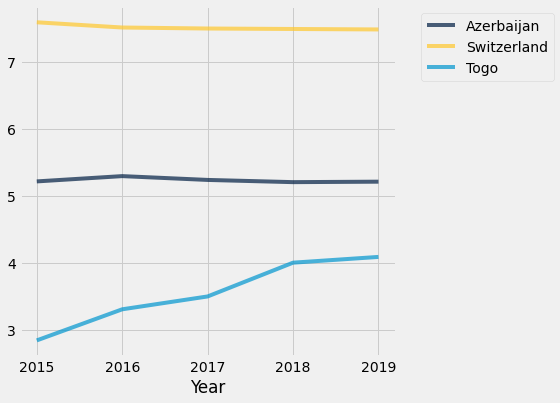

In [113]:
pivotedovertime.plot('Year')

<font color='sky blue'>

plot showing the happiness score values of Azerbaijan, Switzerland and Togo over time

<font color='purple'>

Here we observe that the median and highest happiness scores in 2015 show little to no change over the next 4 years, whereas the happiness score of the lowest scoring country in 2015 (Togo) increases.

In [114]:
happy19.where('Country', are.equal_to('Togo'))

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2019,Togo,139,4.085,0.275,0.085,0.572,0.41,0.293,0.177


In [115]:
happy19.where('Happy Rank', are.equal_to(156))

Year,Country,Happy Rank,Happy Score,GDP,GOV Trust,Family,Health,Freedom,Generosity
2019,South Sudan,156,2.853,0.306,0.091,0.575,0.295,0.01,0.202


<font color='purple'>

Upon further investigation we can see that Togo is no longer the lowest ranked in 2019, and instead South Sudan holds that spot likely due to changes in the ongoing civil war over that time. 

In [116]:
#created function to easily plot any country happy score over time 
def happy_overtime_plot(country):
    
    '''Plot the happy score of any country from 2015 to 2019 '''
    
    overtime = allhappy.select('Year','Country','Happy Score').where('Country', are.equal_to(country))
    pivotedovertime = overtime.pivot('Country', 'Year', values='Happy Score', collect=max)
    return pivotedovertime.plot('Year')

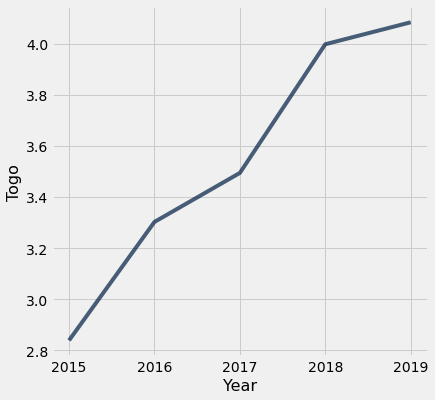

In [117]:
happy_overtime_plot('Togo')

<font color='sky blue'>
Plot showing how the happiness score of Togo changed over time

<font color='purple'>
In order to see how other categories contributed to the change in the happiness score of Togo over time, we also need to see how these categories changed over time. The function below is designed to create an overlayed plot of how these other categories changed over time. 

In [118]:
#determining if there was any particular factor that increased over time with the increase in happy score of a country.
def country_category_over_time(country):
    country_table = allhappy.where('Country', country).drop('Country', 'index','Happy Rank', 'Happy Score')
    return country_table.plot('Year')

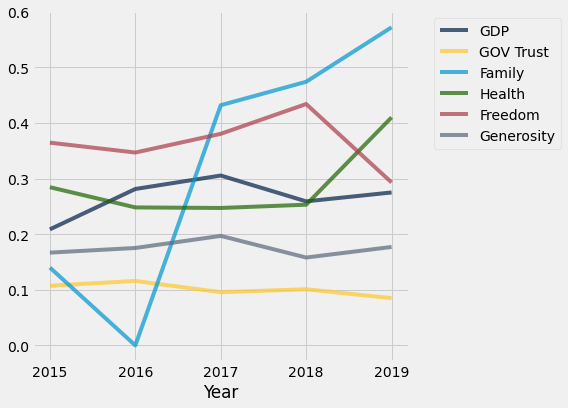

In [119]:
country_category_over_time('Togo')

<font color='sky blue'>
overlayed plot showing how other categories of Togo changed over time

<font color='purple'>
As the overlayed plot shows, family score had the greatest change (increase) over time and it's possible that it contributed to the overal improvement in the happiness score of Togo over time.

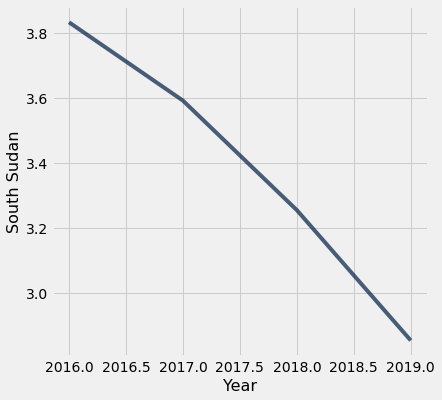

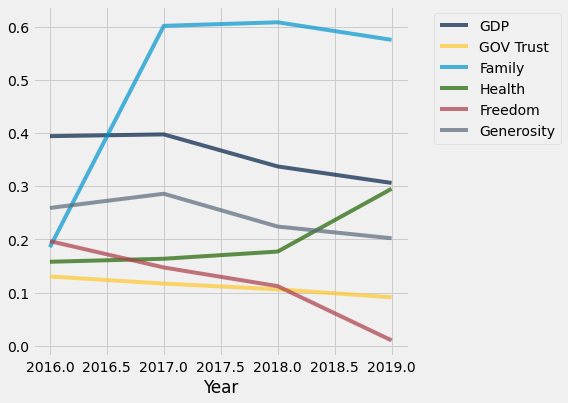

In [120]:
happy_overtime_plot('South Sudan')
country_category_over_time('South Sudan')

<font color='sky blue'>
Plot showing how the happiness score of South Sudan changed over time and overlayed plot showing how other categories of South Sudan changed over time

<font color = 'purple'>
Performing the same set of visualizations on South Sudan, which had the lowest happiness score in 2019, show that there was a drop in the scores of all the categories except Health, which had an overall increase of about 0.14. Freedom had the greatest drop over the 5 years (about 0.2) and had an almost 0 score in 2019, which is in line with our prediction that Sudan's tail spot was most likely due to the civil war at the time.



<br>

<font color = 'purple'>
Next, we will show how the yearly average scores of all countries in our dataset changed over time.

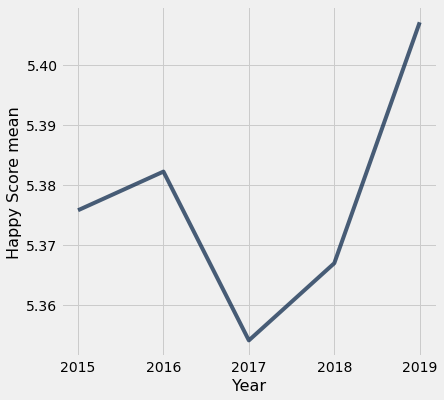

In [121]:
average_per_yr.plot('Year', 'Happy Score mean')

<font color='sky blue'>
    average happiness score of all countries over time

<font color='purple'>
As the plot above shows, the lowest average happiness score for all countries in our dataset was in 2017, after which the score increased and reached a maximum over all the 5 years in 2019, which was about 5.408.
    
NOTE that the y-axis is smaller than happiness plots of individual countries, the average happy scores have minute changes in comparison.

<br>

<font color='purple'>
    
In the following cells we will now examine how the Happy Score and other factors are related across countries and years.

In [122]:
type(allhappy.labels) #determining if labels are iterable

tuple

In [123]:
labels_tuple = allhappy.labels
type(labels_tuple[0]) #making sure the tuple countains the expected data type, string

str

In [124]:
def compare_category_with_happy_score():
    '''Allows easy comparison of all columns in the allhappy table  against happy score'''
    relevant_categories = allhappy.drop('Year', 'Country', 'index', 'Happy Rank')
    labels_tuple = relevant_categories.labels
    for label in labels_tuple:
        if label == 'Happy Score':
            continue
        categories_table = relevant_categories.select('Happy Score', label)  
        categories_table.scatter('Happy Score')

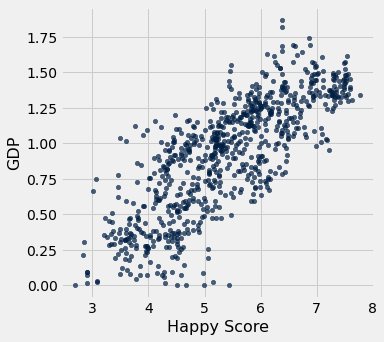

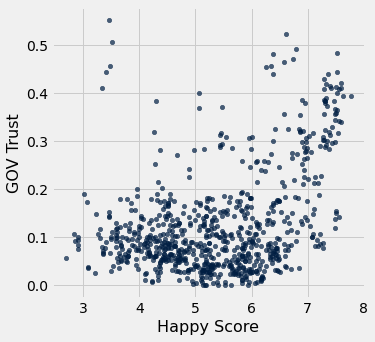

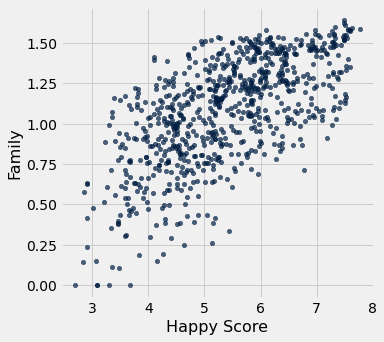

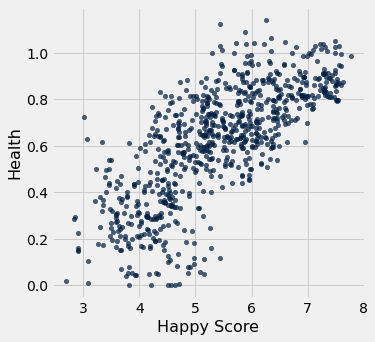

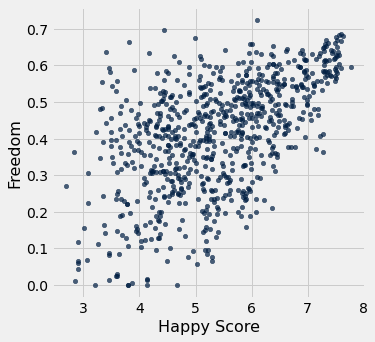

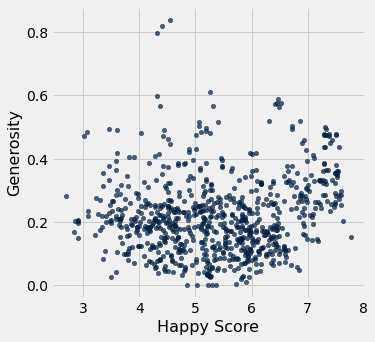

In [125]:
compare_category_with_happy_score()

<font color='sky blue'>
    scatter plots of Happy Score against other categories

## 6. Statistical Inference

Categories: 
- Hypothesis test
- Estimation (e.g. confidence intervals via bootstrapping) 
- Prediction (e.g. correlation or a linear regression line fit from a scatter plot) 


<font color='purple'>
We will use linear regression to more closely observe relationships between 'Happy Score' and other variables. 

Linear Regression, R^2, Bootstrap, and Confidence Interval code below was copied from Linear Regression Diagnostics notebook 11/21 (and imported from cs104_inference in part 4).

<br>

<font color='purple'>
Note: For our Statistical Inference plots and predictions we will work with the first three categories from the scatter plots in the previous section. These are quite similar to and representative of the other three plots so we didn't see it necessary to use all 6 categories visualized above in this section. 

<br>

<font color='purple'>
    
__We will now start by analyzing the first category, GDP__

<br>

<font color='purple'>
Reminder: The GDP score in this category is not the actual GDP of a country but rather an estimate of the extent to which  economic production contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

In [126]:
gdp_scatt = allhappy.select('Happy Score','GDP')

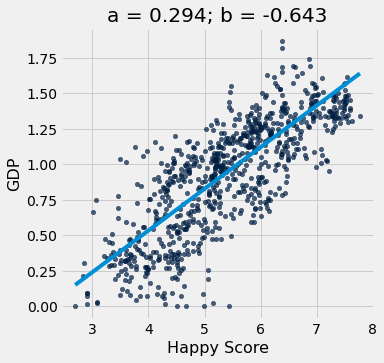

In [127]:
gdp_optimal = linear_regression(gdp_scatt, 'Happy Score','GDP') 
gdpa = gdp_optimal.item(0)
gdpb = gdp_optimal.item(1)    
plot_scatter_with_line(gdp_scatt, 'Happy Score','GDP', gdpa, gdpb)


<font color='sky blue'>
Scatter plot of Happy Score and GDP with linear regression line 

0.6194495654730915

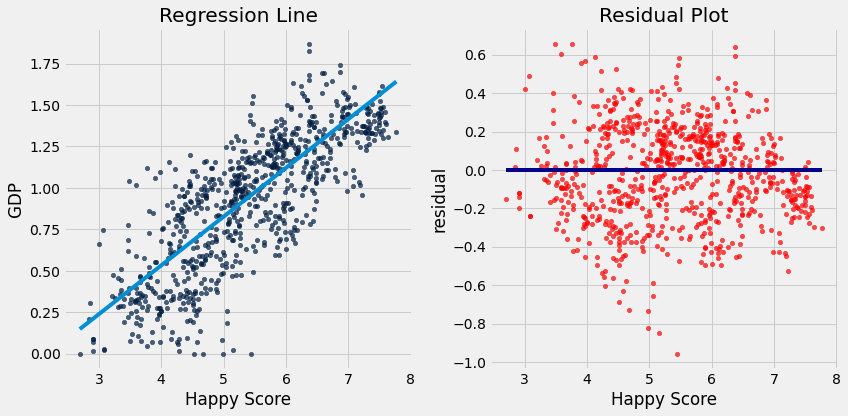

In [128]:
#create residual plot and give r^2 value 
plot_regression_line_and_residuals(gdp_scatt, 'Happy Score','GDP', gdpa, gdpb)
gdpr2 = r2_score(gdp_scatt, 'Happy Score','GDP', gdpa, gdpb)
gdpr2

<font color='sky blue'>
Residual plot and scatter plot of Happy Score and GDP with linear regression line 

<font color='purple'>

Residual plot visually shows a pretty even distribution, suggesting that a linear relationship is a good fit for GDP and Happy Score. 

(r^2 values summarized at the end of the section)

In [129]:
def bootstrap_prediction(x_target_value, observed_sample, x_label, y_label, num_trials):
    """
    Create boostrap resamples and predict y given x_target_value 
    """

    bootstrap_statistics = make_array()
    
    for i in np.arange(0, num_trials): 
        
        simulated_resample = observed_sample.sample()
        a,b = linear_regression(simulated_resample, x_label, y_label)
        resample_statistic = line_predictions(a,b,x_target_value)
        
        bootstrap_statistics = np.append(bootstrap_statistics, resample_statistic)
    
    return bootstrap_statistics

In [130]:
#use bootstrapping to understand the accuracy of our line of best fit 
#to predict GDP based on Happy Score
x_target_value = 5.5  #value of Happy Score on which the prediction of GDP score is to be based
gdp_bootstrap_statistics = bootstrap_prediction(x_target_value, gdp_scatt, 'Happy Score','GDP', 100)

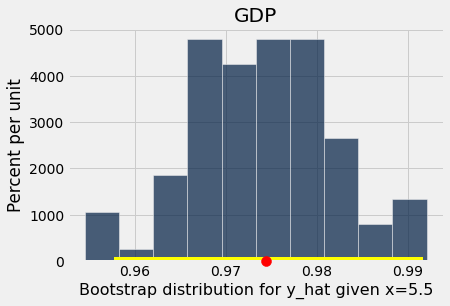

In [131]:
results = Table().with_columns("Bootstrap distribution for y_hat given x="+str(x_target_value), gdp_bootstrap_statistics)
results.hist()

plots.scatter(line_predictions(gdpa, gdpb, x_target_value), 0, color='red', s=100, zorder=10, clip_on=False);
gdp_left_right = percentile_method(95, gdp_bootstrap_statistics)
plots.plot(gdp_left_right, [0, 0], color='yellow', lw=8) #added (gdp_)
plots.title('GDP');

<font color='sky blue'>
95% Confidence Interval for GDP values given a Happy Score of 5.5. Current Confidence Interval range: 0.95 - 0.99

In [132]:
gdp_CI = gdp_left_right
gdp_CI

array([0.95773912, 0.99163835])

<font color='purple'>
The 95% confidence interval tells us that if we were to have 100 samples of the GDP distribution the actual predicted value of GDP score based on a Happy Score of 5.5 would be found in 95 of them.

<br>

<font color='purple'>
    
__Now we will do the same statistical inference for GOV Trust__

<font color='purple'>
Reminder: The GOV Trust score in this category is an estimate of the extent to which the absence of corruption contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

In [133]:
gvt_trust_scatt = allhappy.select('Happy Score','GOV Trust')

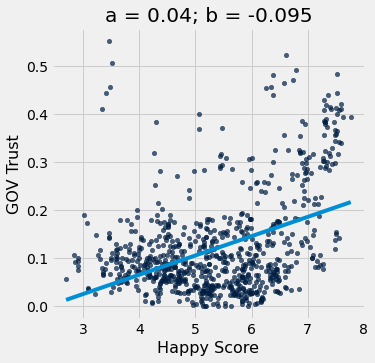

In [134]:
gvt_trust_optimal = linear_regression(gvt_trust_scatt, 'Happy Score','GOV Trust') 
gvt_trust_a = gvt_trust_optimal.item(0)
gvt_trust_b = gvt_trust_optimal.item(1)    
plot_scatter_with_line(gvt_trust_scatt, 'Happy Score','GOV Trust', gvt_trust_a, gvt_trust_b)

<font color='sky blue'>
Scatter plot of Happy Score and GOV Trust with linear regression line 

0.1557323330532

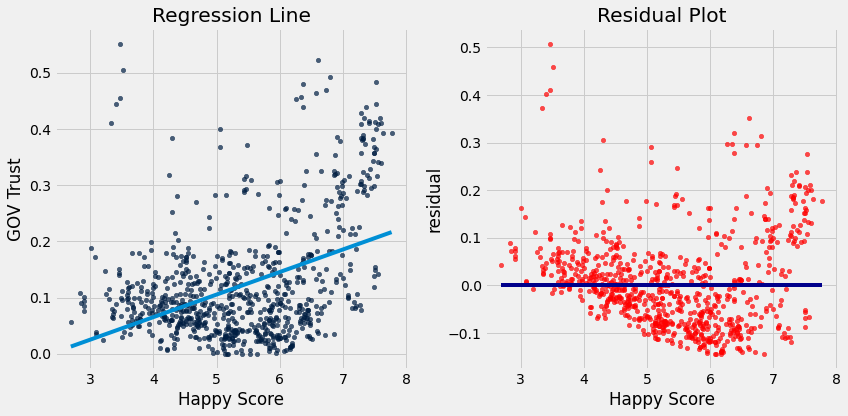

In [135]:
#create residual plot and give r^2 value 
plot_regression_line_and_residuals(gvt_trust_scatt, 'Happy Score','GOV Trust', gvt_trust_a, gvt_trust_b)
gvtr2 = r2_score(gvt_trust_scatt, 'Happy Score','GOV Trust', gvt_trust_a, gvt_trust_b)
gvtr2

<font color='sky blue'>
Residual plot and scatter plot of Happy Score and GDP with linear regression line 

<font color='purple'>

Residual plot visually shows an uneven distribution (more concentrated below line), suggesting that a linear relationship is not a good fit for GOV Trust and Happy Score. A positive expontential relationship may be more fitting. 

(r^2 values summarized at the end of the section)

In [136]:
#use bootstrapping to understand the accuracy of our line of best fit 
#to predict Gov Trust based on Happy Score
x_target_value = 5.5
gvt_trust_bootstrap_statistics = bootstrap_prediction(x_target_value, gvt_trust_scatt, 'Happy Score','GOV Trust', 100)

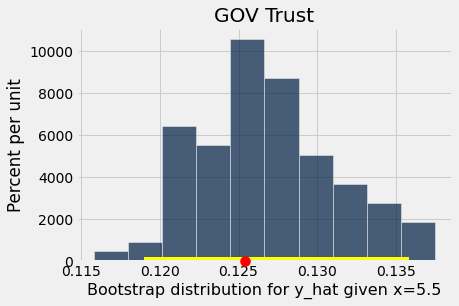

In [137]:
results = Table().with_columns("Bootstrap distribution for y_hat given x="+str(x_target_value), gvt_trust_bootstrap_statistics)
results.hist()

plots.scatter(line_predictions(gvt_trust_a, gvt_trust_b, x_target_value), 0, color='red', s=100, zorder=10, clip_on=False);
gvt_trust_left_right = percentile_method(95, gvt_trust_bootstrap_statistics)
plots.plot(gvt_trust_left_right, [0, 0], color='yellow', lw=8)
plots.title('GOV Trust');

<font color='sky blue'>
95% Confidence Interval for GOV Trust values given a Happy Score of 5.5. Current Confidence Interval range: 0.119 - 0.133

In [138]:
gvt_CI = gvt_trust_left_right
gvt_CI

array([0.11897963, 0.13582948])

<font color='purple'>
The 95% confidence interval tells us that if we were to have 100 samples of the GOV Trust distribution the actual predicted value of GOV Trust score based on a Happy Score of 5.5 would be found in 95 of them.

<br>

<font color='purple'>
    
__Now we will do the same statistical infererence for Family__

<font color='purple'>
Reminder: The Family score in this category is not the number of people in a person's family but rather an estimate of the extent to which social support contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

In [139]:
family_scatt = allhappy.select('Happy Score', 'Family')
#family_scatt.scatter('Happy Score')

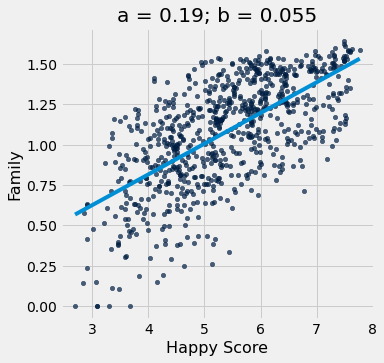

In [140]:
family_optimal = linear_regression(family_scatt, 'Happy Score','Family') 
family_a = family_optimal.item(0)
family_b = family_optimal.item(1)    
plot_scatter_with_line(family_scatt, 'Happy Score','Family', family_a, family_b)

<font color='sky blue'>
Scatter plot of Happy Score and Family score with linear regression line 

0.42412074527920884

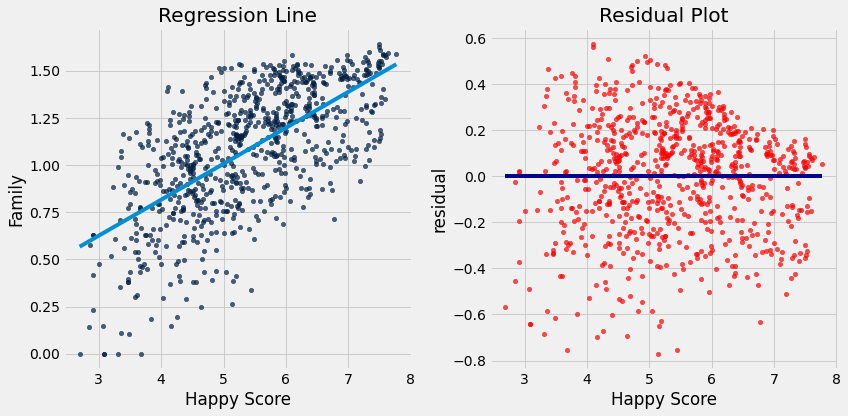

In [141]:
#create residual plot and give r^2 value 
plot_regression_line_and_residuals(family_scatt, 'Happy Score','Family', family_a, family_b)
famr2 = r2_score(family_scatt, 'Happy Score','Family', family_a , family_b )
famr2

<font color='sky blue'>
Residual plot and scatter plot of Happy Score and Family score with linear regression line 

<font color='purple'>

Residual plot visually shows a pretty even distribution with some heteroscedasticity above the line, suggesting that a linear relationship may be a good fit for Family and Happy Score. It's possible that the relationship between Happy Score and the residuals overestimates the strength of the fit. 

(r^2 values summarized at the end of the section)

In [142]:
#use bootstrapping to understand the accuracy of our line of best fit 
#to predict Family based on Happy Score
x_target_value = 5.5
family_bootstrap_statistics = bootstrap_prediction(x_target_value, family_scatt, 'Happy Score','Family', 100)

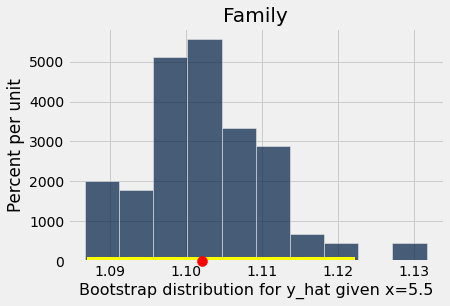

In [143]:
results = Table().with_columns("Bootstrap distribution for y_hat given x="+str(x_target_value), family_bootstrap_statistics)
results.hist()

plots.scatter(line_predictions(family_a, family_b, x_target_value), 0, color='red', s=100, zorder=10, clip_on=False);
family_left_right = percentile_method(95, family_bootstrap_statistics)
plots.plot(family_left_right, [0, 0], color='yellow', lw=8)
plots.title('Family');

<font color='sky blue'>
95% Confidence Interval for Family score values given a Happy Score of 5.5. Current Confidence Interval range: 1.09 - 1.12

In [144]:
fam_CI = family_left_right
fam_CI

array([1.08706499, 1.12218312])

<font color='purple'>
The 95% confidence interval tells us that if we were to have 100 samples of the Family scores distribution the actual predicted value of Family score based on a Happy Score of 5.5 would be found in 95 of them.

<br>

<font color = 'purple'>
Below is an example of an interactive bootstrap resample that alters x target (Happy Score to be predicted) and sample size of the bootstrap. Here the Family graph is used as an example, but the same could be applied to any of the variables.

In [145]:
def visualize_x_target_value_and_sample_size(x_target_value, sample_size):
    
    family_bootstrap_statistics = bootstrap_prediction(x_target_value, family_scatt, 'Happy Score','Family', sample_size)
    
    results = Table().with_columns("Bootstrap distribution for y_hat given x="+str(x_target_value), family_bootstrap_statistics)
    results.hist()
    
    # family_optimal = linear_regression(family_scatt, 'Happy Score','Family') 
    # family_a = family_optimal.item(0)
    # family_b = family_optimal.item(1)

    plots.scatter(line_predictions(family_a, family_b, x_target_value), 0, color='red', s=100, zorder=10, clip_on=False);
    family_left_right = percentile_method(95, family_bootstrap_statistics)
    plots.plot(family_left_right, [0, 0], color='yellow', lw=8)
    plots.title('Family');
    
_ = widgets.interact(visualize_x_target_value_and_sample_size,
                     x_target_value=(-10,20),    
                     sample_size=(10,1000))
                     

interactive(children=(IntSlider(value=5, description='x_target_value', max=20, min=-10), IntSlider(value=505, …

<font color = 'sky blue'>
Interactive bootstrap resample that allows different x_target (Happy Score) value to be predicted and different sample sizes of the bootstrap.

<font color = 'purple'>
From the interactive widget and corresponding graph we notice that as the sample size increases the graph becomes more bell-shaped and less spread out, which shows how the prediction becomes more reliable with a greater sample size.  
    
As we change the x_target value we see which Happy Scores are most dominant in this Family distribution; when we put outarageous values (for example negative) there is more variance in the graph and the distribution has an odd shape. As we get closer to actual x_target values in the table we see less variance in the distribution and it becomes more bell-shaped.   

In [146]:
category = make_array('GDP', 'Gov Trust', 'Family')
rsqvalues = make_array (gdpr2 , gvtr2, famr2 )
confidence_interval = make_array (gdp_CI.item(1)-gdp_CI.item(0), gvt_CI.item(1)-gvt_CI.item(0),fam_CI.item(1)-fam_CI.item(0))

In [147]:
Table().with_columns('category', category).with_columns('rsqvalue', rsqvalues).with_columns('CI diff for 5.5 x', confidence_interval)

category,rsqvalue,CI diff for 5.5 x
GDP,0.61945,0.0338992
Gov Trust,0.155732,0.0168498
Family,0.424121,0.0351181


<font color = 'purple'>
R^2 values indicate: GDP shows the best linear relationship, then Family, then Gov Trust. This aligns with analyses of their residual plots. Gov Trust in particular might suit a non-linear relationship. 

<font color='purple'>

CI values: may not be comparable across categories but differences are summarized here!

<br>

<font color = 'purple'>

Now we'll find the r^2 values for the other categories and determine their rank

In [148]:
def r_squared_value_for_any_category():
    r_squared_values = make_array()
    categories_list = make_array()
    relevant_categories = allhappy.drop('Year', 'Country', 'index', 'Happy Rank', 'Happy Score')
    labels_tuple = relevant_categories.labels
    
    for category in labels_tuple:
        category_scatt = allhappy.select('Happy Score', category)
        table_optimal = linear_regression(category_scatt, 'Happy Score',category) 
        a = table_optimal.item(0)
        b = table_optimal.item(1) 
        
        r2 = r2_score(category_scatt, 'Happy Score',category, a , b )
        r_squared_values = np.append(r_squared_values,r2)
        categories_list = np.append(categories_list,category)
        
    output_table = Table().with_columns('Category', categories_list).with_columns('R_squared_values', r_squared_values)
    return output_table

In [149]:
R_square_values_table = r_squared_value_for_any_category()
R_square_values_table.sort('R_squared_values', descending=True)

Category,R_squared_values
GDP,0.61945
Health,0.548796
Family,0.424121
Freedom,0.306122
GOV Trust,0.155732
Generosity,0.0190832


##  Additional work

<font color = 'purple'>
Now that we have done an analysis of the relationship between different factors such as GDP score, GOV Trust score and Family score all against Happiness Score we now want to see if there is a correlation between these factors and each other.

<br>

<font color = 'purple'>
For this, we will use panda and seaborn to create a giant grid showing the different relationships on one screen.

In [150]:
!pip3 install -q pandas 
!pip3 install -q scikit-learn
!pip3 install -q seaborn

In [151]:
import pandas as pd
# from scikit-learn import * 
import seaborn as sns

In [152]:
df_table = df

In [153]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        781 non-null    int64  
 1   Year         781 non-null    int64  
 2   Country      781 non-null    object 
 3   Happy Rank   781 non-null    int64  
 4   Happy Score  781 non-null    float64
 5   GDP          781 non-null    float64
 6   GOV Trust    781 non-null    float64
 7   Family       781 non-null    float64
 8   Health       781 non-null    float64
 9   Freedom      781 non-null    float64
 10  Generosity   781 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 67.2+ KB


In [154]:
df_table.drop('index', inplace=True, axis=1)

In [155]:
df_table.drop('Happy Rank', inplace=True, axis=1)

In [156]:
df_table.drop('Year', inplace=True, axis=1)

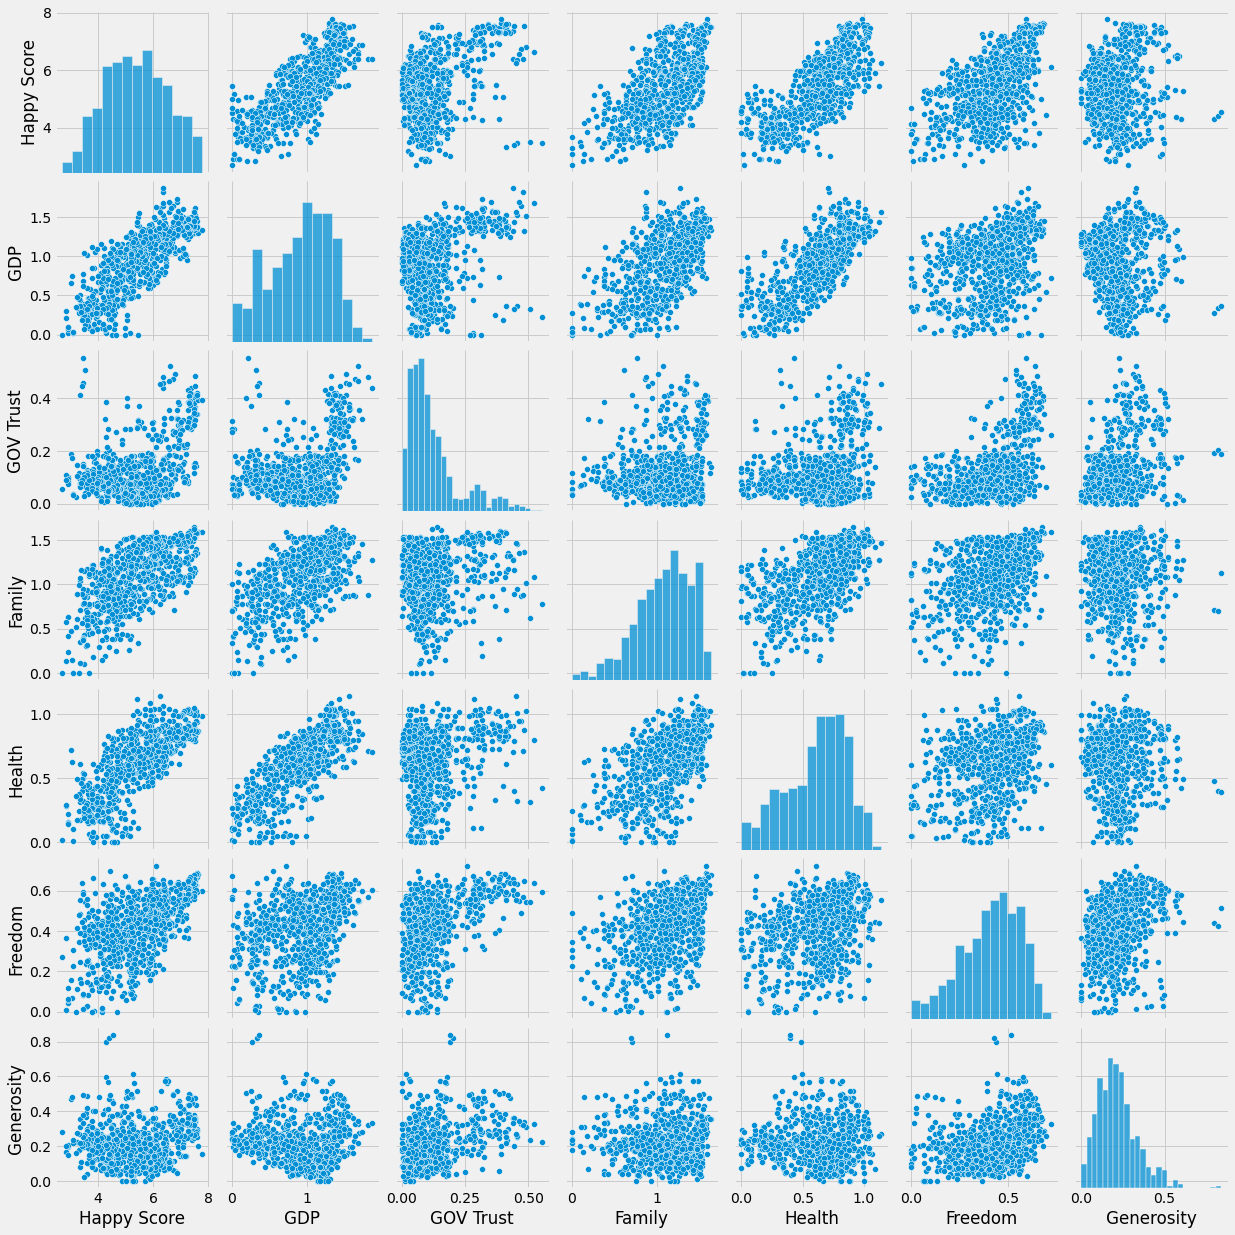

In [157]:
sns.pairplot(df_table)

<font color = 'sky blue'>
Seaborn pairplot showing graphs of each category in the main table against every other category

<font color = 'purple'>
The graphs show that the categories that have a linear correlation with the Happy Score also tend to have a linear correlation with each other. For instance, Health has positive linear correlations with GDP, Family, and Freedom, which each also have a positive linear correlation with Happy Score. It has a non-linear correlation with GOV Trust and Generosity, which also do not have linear correlations with Happy Score. 
Based on this observation we can conclude that increasing one factor that positively contributes to the happiness score of a country will also increase another factor in a way that positively impacts the happiness score. Countries which have the best happiness score have high scores in many categories that have a positive correlation with the Happy Score while those with the worst scores have low scores in not one but many of those same categories. 

##  Additional work

## 7. Ethics


This particular data set uses survey information collected by the Gallup World Poll. Gallup explains on their website that representative samples from each country are used to poll individual people. Most are phone interviews but some require a face-to-face setting. From what we can tell, person specific data from people who answer the poll is not collected, and only country wide data is made available. In this regard, personal rights to privacy anonymization and to be forgotten are protected by the data collection process. 
Additionally, a consequentialist might point to the positive impacts using happiness polls might produce. Kaggle explains that happiness is a proven indicator of national progress. More and more governments are using their indicators to inform policy and national decision making. Understanding how policy has affected the well being of a country’s citizens is likely to produce positive changes in the policies being created. 
Finally, other data, about GDP for example, is widely used and available to the public. Using it here is unlikely to amplify any potentially harmful uses that haven’t already been done. 

 
Info about datasets:

from https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv 

from https://www.gallup.com/178667/gallup-world-poll-work.aspx 

## 8. Conclusions



While many factors contribute to the happiness of individuals in a country, different factors offer contributions of varying degrees and the aim of this project was to find what factors contribute the most to the overall happiness of countries and how this might change over time for an individual country. We started by looking at the change in happiness score of three countries over time: Switzerland, Azerbaijan, and Togo, which had the highest, median and lowest scores in 2015 respectively. We observed that while the other two countries had relatively the same scores, Togo's score increased significantly over the period 2015-2019 and the main factor that contributed to this improvement was increase in the family score over this period. South Sudan on the other hand had a smooth decline in happiness score over the same time period, ending on the last position in the rank in 2019. Our guess was this could be due to the __[Civil War](https://www.bbc.com/news/world-africa-14019202#:~:text=People%27s%20Liberation%20Movement.-,Civil%20war,-2013%20December%20%2D%20Civil)__  that had begun in December 2013 and was still happening in South Sudan during that time. The Freedom score of South Sudan also decreased significantly during this period, which seemed to be in line with our claim that the happiness score had been influenced by the civil war.

After this we went on to analyze our data to determine the extent to which different factors contributed to the happiness scores of countries ([Quantiative question 1](#qt1)) over the 5 year period and ranked the factors according to their effect. In order to do this we calculated the r^2 values of each category, which are representations of the strength of the linear relationship between the happiness score and the category, and ranked them in a table. Our finding showed us that the GDP score had the greatest correlation with the happiness score of countries, followed by Health, Family, Freedom, Government Trust and lastly Generosity, which barely had any linear relationship with the happiness score. Among these variables, improving GDP will most likely contribute to improving the happiness of citizens. 

The last interesting finding we discovered was the relationship between categories other than the Happiness Score, which tended to be strong between categories that had a strong correlation with the Happiness Score. Based on this observation we can conclude that increasing one factor that positively contributes to the happiness score of a country will also increase another factor that positively impacts the happiness score. Future study might observe how other factors like population, poverty, and education affect happiness and these other correlated factors. 

# You're Done!

**Important submission information:** Follow these steps to submit your work:
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the corresponding assignment. The name of this assignment is "Final Project". **Be sure your work is saved before running the last cell!**

In [158]:
# Save your notebook first, then run this cell to export your submission.
import glob 
grader.export(pdf=False,files=glob.glob("*.csv") + glob.glob("*.py"))